# [Title Here - last thing to update]

### INTRODUCTION [copy from report - no one needs to spend time on this]

- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

### METHODS & RESULTS

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis. (AJ Dreher)
- your report should include code which: (Charul)
 - loads data from the original source on the web **(not from /data folder)**
 - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
 - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
 - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
 - performs the data analysis
 - creates a visualization of the analysis 


*note: all tables and figure should have a figure/table number and a legend*

In [2]:
library(tidyverse)
library(repr)
library(caret)
library(ggplot2)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9

In [7]:
student_data <- read_delim("data/student-por.csv", delim = ";")

glimpse (student_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



Rows: 649
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP"…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F"…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U"…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "L…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T"…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servi…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other",…
$ reason     <chr> "course", "course", "other", "home", "home", "reputation",…
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother"…
$ traveltime <dbl> 2, 1, 1, 1,

In [15]:
student_data <- student_data %>% 
                mutate (parent_ed = (Medu + Fedu)/2) %>% 
            select (G3, absences, parent_ed, studytime)

student_data %>% head (10)

G3,absences,parent_ed,studytime
<dbl>,<dbl>,<dbl>,<dbl>
11,4,4.0,2
11,2,1.0,2
12,6,1.0,2
14,0,3.0,3
13,0,3.0,2
13,6,3.5,2
13,0,2.0,2
13,2,4.0,2
17,0,2.5,2


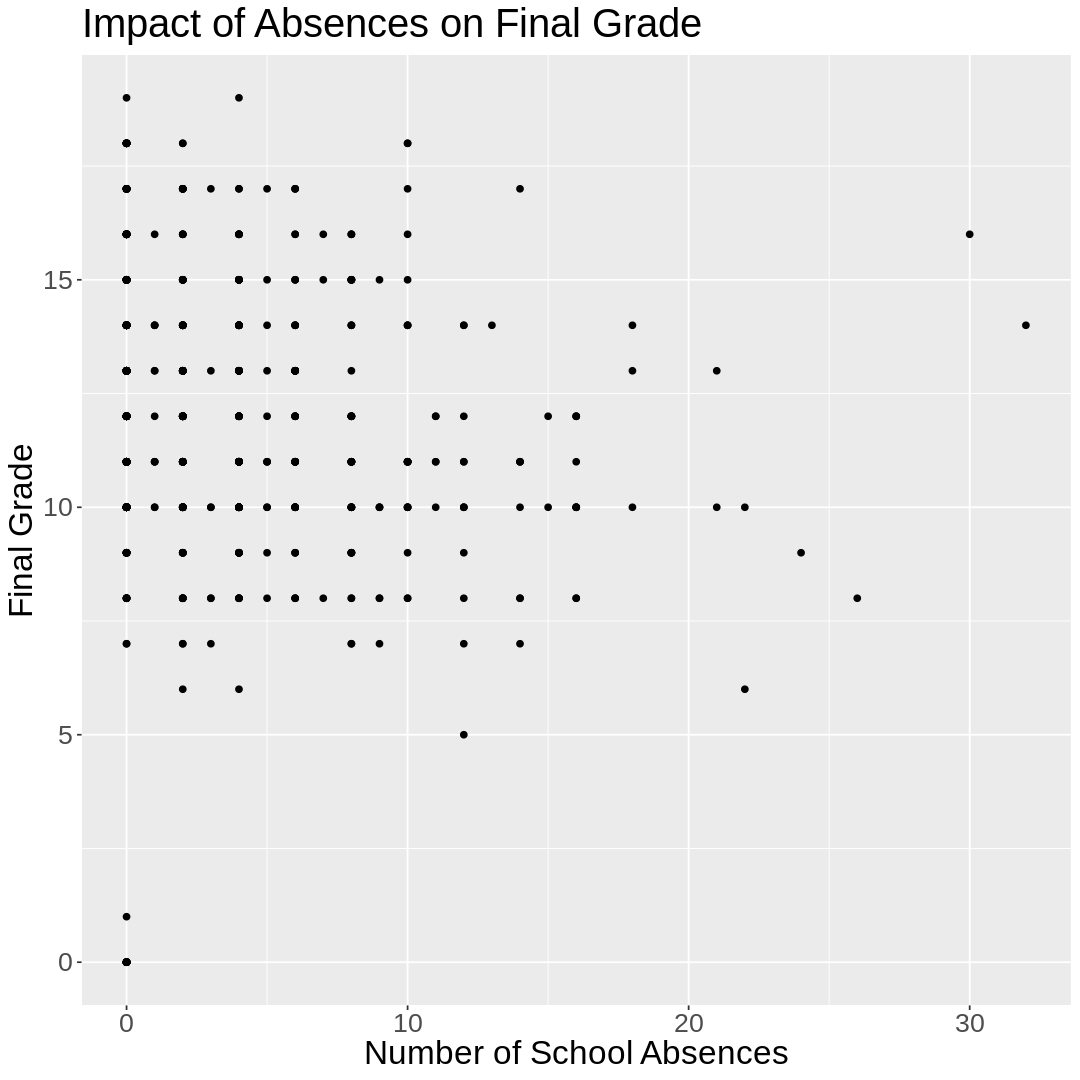

In [16]:
options(repr.plot.width = 9, repr.plot.height = 9)

absences_plot <- ggplot(student_data, aes(x = absences, y = G3)) + 
  geom_point() + 
  xlab("Number of School Absences") +
  ylab("Final Grade") + 
    labs (title = "Impact of Absences on Final Grade") +
theme(text = element_text(size=20)) 

absences_plot

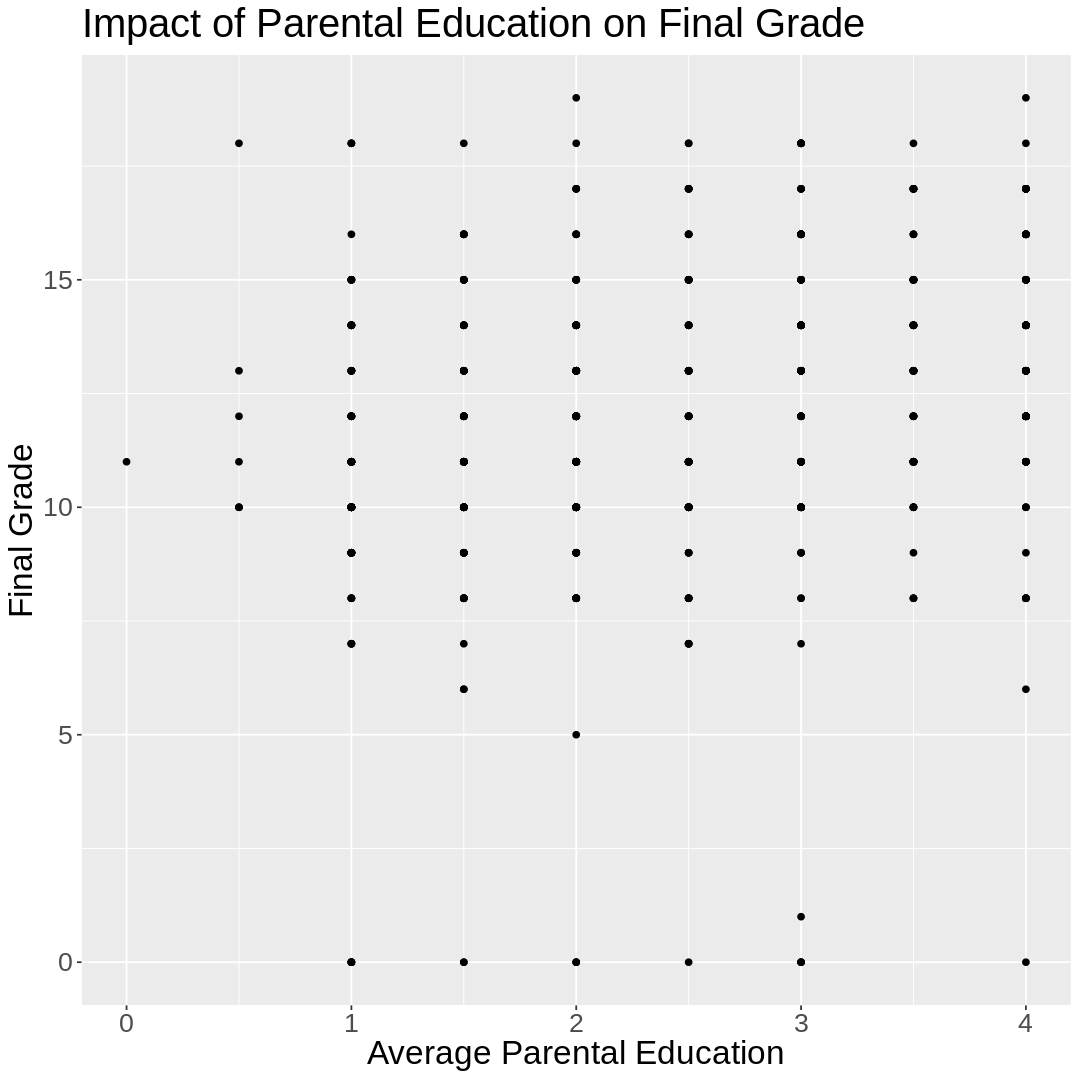

In [17]:
parent_ed_plot <- ggplot(student_data, aes(x = parent_ed, y = G3)) + 
  geom_point() + 
  xlab("Average Parental Education") +
  ylab("Final Grade") + 
    labs (title = "Impact of Parental Education on Final Grade") +
theme(text = element_text(size=20)) 

parent_ed_plot

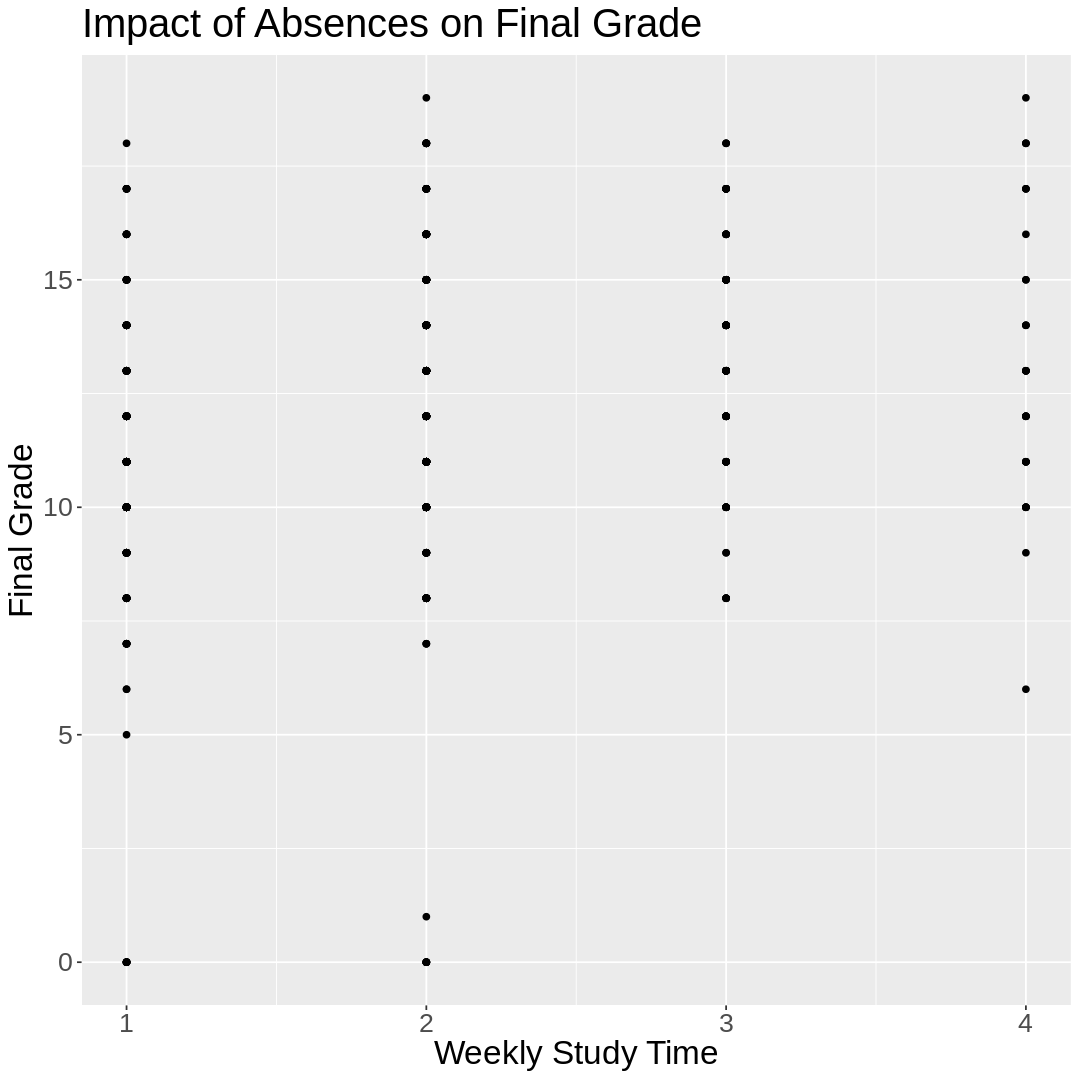

In [18]:
studytime_plot <- ggplot(student_data, aes(x = studytime, y = G3)) + 
  geom_point() + 
  xlab("Weekly Study Time") +
  ylab("Final Grade") + 
    labs (title = "Impact of Absences on Final Grade") +
theme(text = element_text(size=20)) 

studytime_plot

## Discussion (Avery)
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

### References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references)
- Make sure to cite the source of your data as well

**Potential sources:**
- https://inservice.ascd.org/exploring-learning-and-health-what-influences-a-childs-ability-to-learn/
- https://www.education.vic.gov.au/school/teachers/teachingresources/Pages/identifying-high-ability-students.aspx
- https://www.oecd.org/site/educeri21st/40600533.pdf (good source)
- https://owlcation.com/academia/Factors-that-affect-Student-Learning